In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("../data/cbnms_npp_daily.csv")
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.tail()

,npp_mean,npp_std,npp_count,date,month,year
date,,,,,,
2021-05-08,1245.755283,561.038769,3502,2021-05-08,5,2021
2021-05-09,1269.760137,570.905714,3502,2021-05-09,5,2021
2021-05-10,1244.393775,557.987466,3502,2021-05-10,5,2021
2021-05-11,1241.925757,559.085096,3502,2021-05-11,5,2021
2021-05-12,1246.533740,476.554689,2786,2021-05-12,5,2021


In [56]:
def season(month):
    """
    Return the season based on the Month:
    Nov to Feb = Winter
    March to June = Upwelling
    July to Oct = Relaxation
    """
    if (month < 3) | (month > 10):
        return "Winter"
    
    elif (month < 7):
        return "Upwelling"
    
    else:
        return "Relaxation"
    
df['season'] = df['month'].apply(season)
df.head()

,npp_mean,npp_std,npp_count,date,month,year,season
date,,,,,,,
1996-11-01,1127.049608,375.267084,383,1996-11-01,11,1996,Winter
1996-11-02,NaN,NaN,0,1996-11-02,11,1996,Winter
1996-11-03,612.403484,255.105591,3502,1996-11-03,11,1996,Winter
1996-11-04,610.116219,249.345252,3502,1996-11-04,11,1996,Winter
1996-11-05,NaN,NaN,0,1996-11-05,11,1996,Winter


__Caculate the Seasonal Means for the entire timeseries__

In [61]:
df.groupby('season')['npp_mean'].mean()

season
Relaxation    1032.348068
Upwelling      966.782952
Winter         550.869011
Name: npp_mean, dtype: float64

Calculate the mean for each season

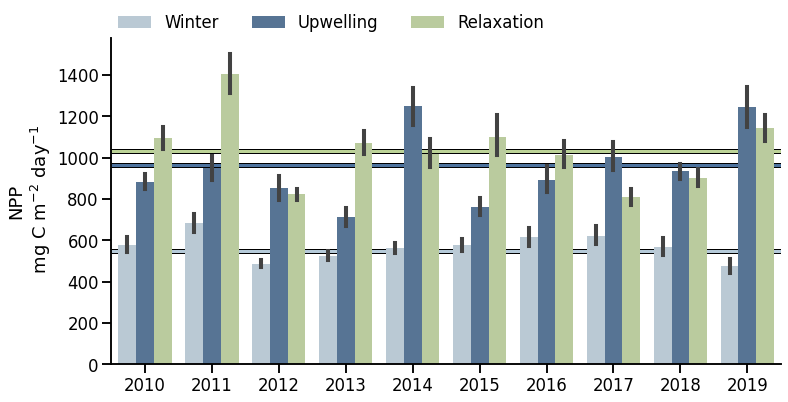

In [94]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

short = df.query("year > 2009 & year < 2020")

palette = ['#B5CAD9', '#4D739E', '#BCD397']


sns.barplot(
    x='year', 
    y='npp_mean', 
    hue='season', 
    data=short, 
    estimator=np.mean, 
    palette=palette)

# Relaxation
ax.hlines(y=1032, xmin=-.5,xmax=9.5,lw=3,zorder=-1,color="#BCD397")
ax.hlines(y=1032, xmin=-.5,xmax=9.5,lw=5,zorder=-2,color="k")

# Upwelling
ax.hlines(y=966, xmin=-.5,xmax=9.5,lw=3,zorder=-1,color="#4D739E")
ax.hlines(y=966, xmin=-.5,xmax=9.5,lw=5,zorder=-2,color="k")
# Winter
ax.hlines(y=550, xmin=-.5,xmax=9.5,lw=3,zorder=-1,color="#B5CAD9")
ax.hlines(y=550, xmin=-.5,xmax=9.5,lw=5,zorder=-2,color="k")

plt.legend(ncol=3, frameon=False,loc=(0,1))
ax.set_xlabel(None)
ax.set_ylabel("NPP\n $ \mathrm{ mg\ C\ m^{-2}\ day^{-1} }$")
ax.set_xlim(-.5,9.5)
sns.despine()
ax.get_xlim()

plt.savefig('../npp_cbnms_mean.png',dpi=300)

### Other Plots ###

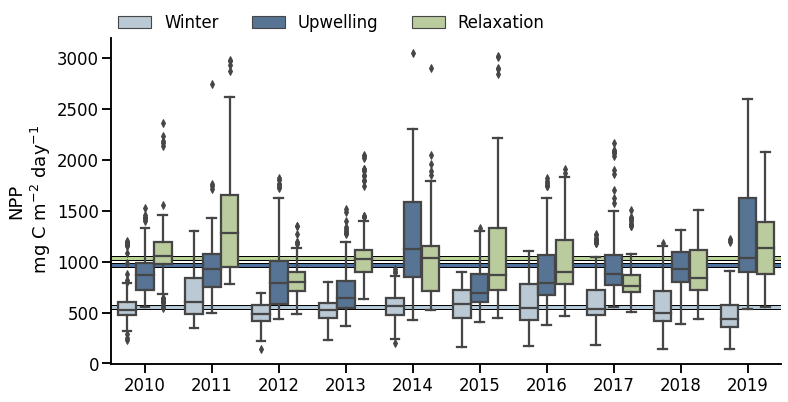

In [98]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

short = df.query("year > 2009 & year < 2020")

palette = ['#B5CAD9', '#4D739E', '#BCD397']


sns.boxplot(
    x='year', 
    y='npp_mean', 
    hue='season', 
    data=short, 
    palette=palette)

# Relaxation
ax.hlines(y=1032, xmin=-.5,xmax=9.5,lw=3,zorder=-1,color="#BCD397")
ax.hlines(y=1032, xmin=-.5,xmax=9.5,lw=5,zorder=-2,color="k")

# Upwelling
ax.hlines(y=966, xmin=-.5,xmax=9.5,lw=3,zorder=-1,color="#4D739E")
ax.hlines(y=966, xmin=-.5,xmax=9.5,lw=5,zorder=-2,color="k")
# Winter
ax.hlines(y=550, xmin=-.5,xmax=9.5,lw=3,zorder=-1,color="#B5CAD9")
ax.hlines(y=550, xmin=-.5,xmax=9.5,lw=5,zorder=-2,color="k")

plt.legend(ncol=3, frameon=False,loc=(0,1))
ax.set_xlabel(None)
ax.set_ylabel("NPP\n $ \mathrm{ mg\ C\ m^{-2}\ day^{-1} }$")
ax.set_xlim(-.5,9.5)
sns.despine()
ax.get_xlim()

# plt.savefig('../npp_cbnms_box.png',dpi=300)